In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from extinction import add_colors_and_abs_mag, correct_flux_excess_factor
from download_isochrone import load_isochrone
from simbad_download import resolve_name

Configuration file not found:

    /home/maya/.dustmapsrc

To create a new configuration file in the default location, run the following python code:

    from dustmaps.config import config
    config.reset()

Note that this will delete your configuration! For example, if you have specified a data directory, then dustmaps will forget about its location.


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# CMD diagram

In [2]:
CLUSTER_NAME: str = 'NGC 2506'

In [3]:
cp_ra, cp_dec, cp_par, cp_pmra, cp_pmdec, cp_radvel = resolve_name(CLUSTER_NAME)

In [4]:
isochrone: np.ndarray = load_isochrone(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_isochrone.dat')

In [5]:
clustered: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_clustered.csv')
found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_found.csv')
not_found: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_not_found.csv')
lit: pd.DataFrame = pd.read_csv(f'data/{CLUSTER_NAME}/{CLUSTER_NAME}_literature.csv')

## Total mass

In [6]:
lit.link_bibcode.unique()

array(['2018A&A...618A..93C', '2008A&A...485..303M',
       '2015MNRAS.446.3651M'], dtype=object)

In [7]:
found.head()

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_y,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences
0,3,3037983136158747648,3,NaN,1636148068921376768,Gaia DR3 3037983136158747648,3037983136158747648,1702076861,2016.0,119.961597,...,0.274071,0.172016,0.101773,0.065664,0.581987,0.001934,1.479225,0.185546,0.006257,0.06
1,4,3037983582835325056,3,NaN,1636148068921376768,Gaia DR3 3037983582835325056,3037983582835325056,978951834,2016.0,119.967136,...,0.195765,0.122868,0.072695,0.046903,0.542625,0.002872,2.579758,0.229467,0.001658,0.54
2,6,3037984270029993344,3,NaN,1636148068921376768,Gaia DR3 3037984270029993344,3037984270029993344,737845908,2016.0,120.104531,...,0.234918,0.147442,0.087234,0.056284,0.568348,0.002294,1.879718,0.324439,0.005057,0.16
3,7,3037984441828696832,3,NaN,1636148068921376768,Gaia DR3 3037984441828696832,3037984441828696832,935186244,2016.0,120.080582,...,0.352377,0.221163,0.130851,0.084425,0.476482,0.002922,2.999165,0.214560,0.007774,0.30
4,8,3037984441828707584,3,NaN,1636148068921376768,Gaia DR3 3037984441828707584,3037984441828707584,1628251968,2016.0,120.078215,...,0.180731,0.113433,0.067112,0.043301,0.528513,0.003631,2.814708,0.206274,0.005173,0.24


In [8]:
not_found = pd.merge(not_found, lit[['EDR3 id', 'link_bibcode']], on='EDR3 id')

In [9]:
not_found[not_found.occurences==0.0]['link_bibcode'].value_counts()

2018A&A...618A..93C    1
Name: link_bibcode, dtype: int64

In [10]:
clustered = add_colors_and_abs_mag(clustered)
found = add_colors_and_abs_mag(found)
not_found = add_colors_and_abs_mag(not_found)

In [12]:
len(found[found.occurences>=0.84])

794

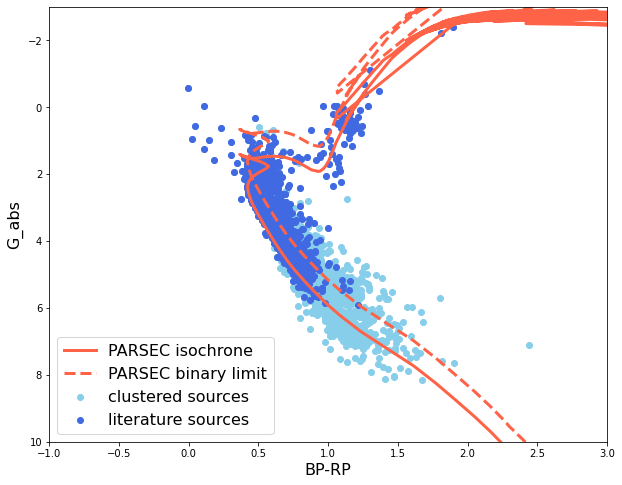

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(found['BP-RP'], found['G_abs'], color='royalblue', label='literature sources')
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);

# Not found?

In [14]:
print(f'{len(not_found[not_found.occurences==0.0])} literature sources were not clustered.')

1 literature sources were not clustered.


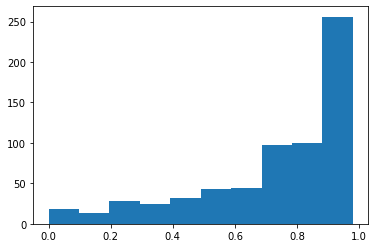

In [15]:
plt.hist(not_found.occurences);

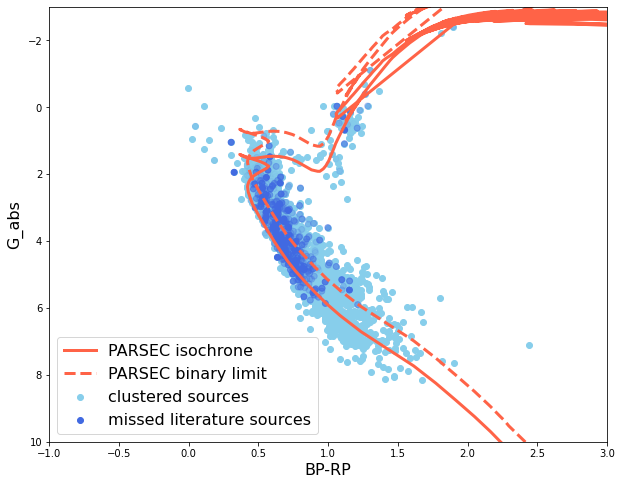

In [16]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue', label='clustered sources');
plt.scatter(not_found['BP-RP'], not_found['G_abs'], color='royalblue',
            label='missed literature sources', alpha=1-not_found['occurences'])
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato', linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato', linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('G_abs', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [17]:
def found_vs_not_found_hist(found: pd.DataFrame,
                            not_found: pd.DataFrame,
                            prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', alpha=0.5, label='Found literature sources', density=True, bins=50)
    plt.hist(not_found[prop], color='tomato', alpha=0.5, label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);

In [18]:
def found_vs_not_found_hist_xlines(found: pd.DataFrame,
                                   not_found_values: list,
                                   prop: str):
    plt.figure(figsize=(8, 5))
    plt.hist(found[prop], color='royalblue', label='Found literature sources', density=True, bins=50)
    for val in not_found_values:
        plt.axvline(x=val, linestyle='--', color='black', linewidth=2)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16)

In [19]:
def not_found_hist(not_found: pd.DataFrame,
                   prop: str,
                   threshold: float = None):
    plt.figure(figsize=(8, 5))
    plt.hist(not_found[prop], color='tomato', label='Missed literature sources', density=True, bins=20)
    plt.gca().set_xlabel(prop, fontsize=16)
    plt.legend(fontsize=16);
    if threshold:
        plt.axvline(x=threshold, linestyle='--', color='black', linewidth=2)

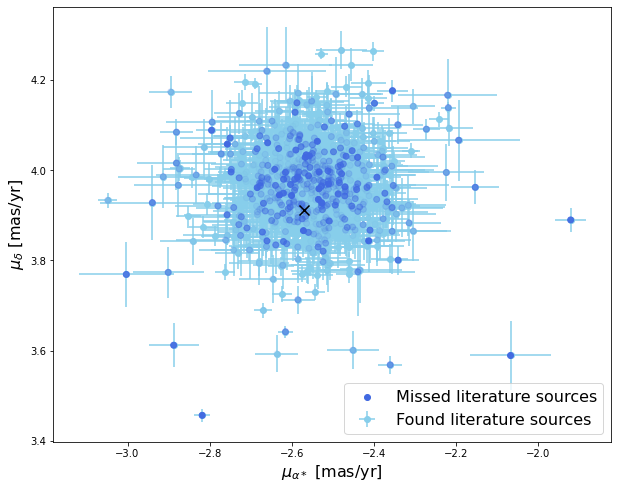

In [20]:
plt.figure(figsize=(10, 8))
plt.errorbar(found.pmra, found.pmdec, xerr=found.pmra_error,
             yerr=found.pmdec_error, color='skyblue', fmt='o', zorder=0,
             label='Found literature sources')
plt.scatter(not_found.pmra, not_found.pmdec, alpha=1-not_found.occurences, color='royalblue', zorder=1,
             label='Missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=2)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
lgnd = plt.legend(fontsize=16);
for handle in lgnd.legendHandles:
    handle._alpha = 1.;

In [21]:
tot_not_found = not_found[not_found.occurences==0]
PMRA_STD = np.std(np.abs(found.pmra-cp_pmra))
PMDEC_STD = np.std(np.abs(found.pmdec-cp_pmdec))

In [22]:
tot_not_found

,Unnamed: 0,EDR3 id,reported,TIC,solution_id,designation,source_id,random_index,ref_epoch,ra,...,A_J,A_H,A_K,BP-RP,BP-RP_error,G_abs,G_abs_error,excess,occurences,link_bibcode
158,1080,3038078553151659776,3,NaN,1636148068921376768,Gaia DR3 3038078553151659776,3038078553151659776,831395473,2016.0,120.302592,...,0.073721,0.043617,0.028142,0.528478,0.002802,2.414663,0.337252,-0.002223,0.0,2018A&A...618A..93C


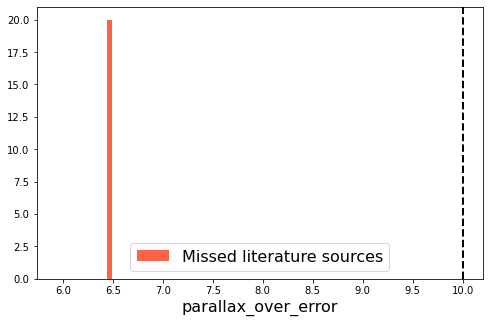

In [23]:
not_found_hist(tot_not_found, 'parallax_over_error', 10.0);

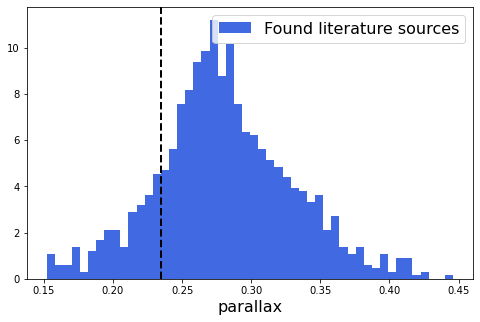

In [24]:
found_vs_not_found_hist_xlines(found, tot_not_found.parallax.values, 'parallax')

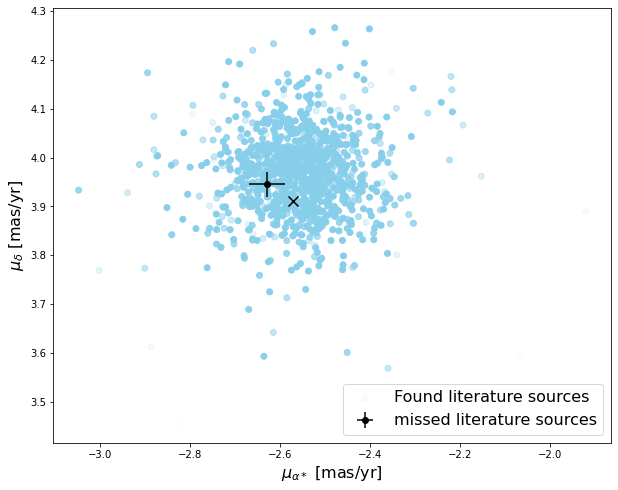

In [25]:
plt.figure(figsize=(10, 8))
plt.scatter(found.pmra, found.pmdec, color='skyblue', zorder=1, alpha=found.occurences,
             label='Found literature sources')

plt.errorbar(tot_not_found.pmra, tot_not_found.pmdec, fmt='o',
             xerr=tot_not_found.pmra_error, yerr=tot_not_found.pmdec_error,
             color='black', label='missed literature sources')

plt.scatter(cp_pmra, cp_pmdec, marker='x', color='black', s=100, zorder=3)
plt.gca().set_xlabel('$\mu_{\\alpha*}$ [mas/yr]', fontsize=16)
plt.gca().set_ylabel('$\mu_{\delta}$ [mas/yr]', fontsize=16)
plt.legend(fontsize=16);

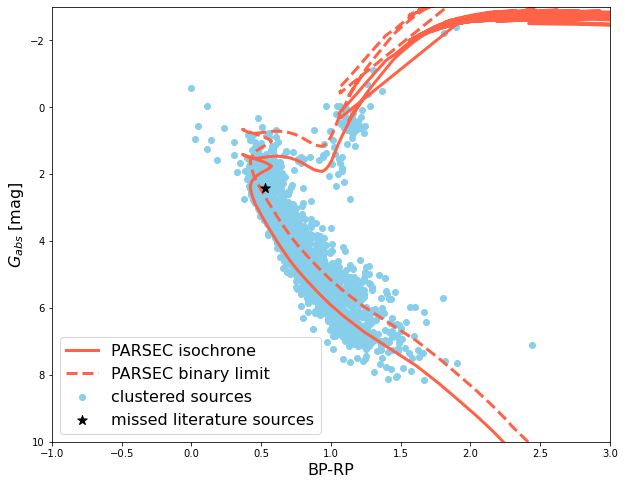

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(clustered['BP-RP'], clustered['G_abs'], color='skyblue',
            label='clustered sources');
plt.scatter(tot_not_found['BP-RP'], tot_not_found['G_abs'], color='black',
            label='missed literature sources', zorder=3, marker='*', s=100)
plt.plot(isochrone[:, 0], isochrone[:, 1], color='tomato',
         linewidth=3, label='PARSEC isochrone');
plt.plot(isochrone[:, 0], isochrone[:, 1]-0.75, color='tomato',
         linewidth=3, linestyle='--', label='PARSEC binary limit');
plt.gca().invert_yaxis();
plt.gca().set_xlabel('BP-RP', fontsize=16);
plt.gca().set_ylabel('$G_{abs}$ [mag]', fontsize=16);
plt.gca().set_ylim(10, -3);
plt.gca().set_xlim(-1, 3);
plt.legend(fontsize=16);